In [4]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. [Basic concepts of ML](#ML)
2. [Linear Regression](#linreg)
3. [NDArray](#array)
4. [Find beta](#findbeta)
5. [Random numbers](#random)
6. [More functions](#func)
7. [Examples](#examples)
8. [Review Problems](#hmwk)


# Statistics and Machine Learning<a id='ml'></a>

### Supervised Learning

<ul>
<li>Given a data set and already know what our correct output should look like
<li>Having the idea that there is a relationship between the input and the output.
<li>Categorized into "regression" and "classification" problems
</ul>

### Unsupervised Learning

<ul>
<li>Problems with little or no idea what our results should look like
<li>Derive structure from data where we don't necessarily know the effect of the variables.
<li>No feedback based on the prediction results, i.e., there is no teacher to correct you
<li>Clustering, association, dimensionality reduction
</ul>


## Basic model building process

<ol>
<li>Identify a problem to be solved
<li>Get some data
<li>Exploratory analysis
<li>Clean the data
<li>Fit a model to the data
<ul>
<li>Split the data into a testing and training set (more on this next time)
<li>Train a model. Tune parameters.
<li>Test the model
<li>If you're happy with the results, you're done!
<li>Otherwise, repeat
</ul>
</ol>

# Linear Regression<a id='linreg'></a>

### Motivation

<ul>
<li>Make predictions about real-world quantities, like sales or life expectancy?
<li>Understand how one variable is determined by a number of others
<li>Examples:
<ul>
<li>How does sales volume change with changes in price. How is this affected by changes in the weather?
<li>How are the conversions on an ecommerce website affected by two different page titles in an A/B comparison?
<li>How is the interest rate charged on a loan affected by credit history and by loan amount?
</ul>
</ul>

### Model set up

Simple linear regression takes the following form:

$y = \beta_0 + \beta_1x$

- $y$ is the response (or dependent variable)
- sometimes you see it as $\hat{y_i}$ which represents an estimate (or prediction) rather than the true value
- $x$ is the feature (or covariate or predictor or independent variable)
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients.

### Another way to write it!

<ul>
<li>In practice use matrices and vectors
<li>Written as $\mathbf{y = \beta x}$ where<br><br>
</ul>

$\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \mathbf{x} = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix}, \beta =   \begin{pmatrix} \beta_1 \\ \beta_2 \end{pmatrix}$  <br>

# How to solve for $\beta?$

Using `numpy`
====

The foundation for numerical computaiotn in Python is the `numpy` package, and essentially all scientific libraries in Python build on this - e.g. `scipy`, `pandas`, `statsmodels`, `scikit-learn`, `cv2` etc. The basic data structure in `numpy` is the NDArray, and it is essential to become familiar with how to slice and dice this object.

Numpy also has the `random`, and `linalg` modules that we will discuss in later lectures.

## NDArray<a id='array'></a>

The base structure in `numpy` is `ndarray`, used to represent vectors, matrices and higher-dimensional arrays. Each `ndarray` has the following attributes:

- `dtype` = correspond to data types in C
- `shape` = dimensionns of array
- `strides` = number of bytes to step in each direction when traversing the array
- Each element of the array is of the same type
- dimensions are called `axes`
- the number of axes is the `rank`


In [5]:
x = np.array([1,2,3,4,5,6])
print "x =", x
print 'dytpe:', x.dtype
print 'shape:', x.shape
print 'ndim:', x.ndim
print 'item size:', x.itemsize
print 'size:', x.size
print 'type:', type(x)

x = [1 2 3 4 5 6]
dytpe: int64
shape: (6,)
ndim: 1
item size: 8
size: 6
type: <type 'numpy.ndarray'>


In [9]:
x.shape = (2,3)
print  x
print 'dytpe:', x.dtype
print 'shape:', x.shape
print 'ndim:', x.ndim
print 'item size:', x.itemsize
print 'size:', x.size
print 'type:', type(x)

[[1 2 3]
 [4 5 6]]
dytpe: int64
shape: (2, 3)
ndim: 2
item size: 8
size: 6
type: <type 'numpy.ndarray'>


### Array creation

<ul>
<li>`dtype`
<li>`arange`
<li>`reshape`, `repeat`, `diag`, `ones`, `zeros`
<li>3d array
</ul>

In [10]:
y = np.array([1,2,3])  # note the square brackets
y

array([1, 2, 3])

In [13]:
y = np.array([1,2,3], dtype = np.float64)    # note the decimals
y

array([ 1.,  2.,  3.])

In [19]:
print np.arange(10)  # numpy object
print range(10)    # regular list

[0 1 2 3 4 5 6 7 8 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [21]:
print np.arange(10)+1
print range(10)+1

[ 1  2  3  4  5  6  7  8  9 10]


TypeError: can only concatenate list (not "int") to list

In [37]:
print np.array([[1,2,3],[4,5,6],[7,8,9]])   # multi dimensional
print np.array([[1,2,3],[4,5,6],[7,8,9]]).shape

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


In [38]:
print np.array([[1,2,3],[4,5,6],[7,8,9,10]])   # not all sublists are same length - no error
print np.array([[1,2,3],[4,5,6],[7,8,9,10]]).shape

[[1, 2, 3] [4, 5, 6] [7, 8, 9, 10]]
(3,)


### `numpy` helper functions to initialize array

In [437]:
np.ones(10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [438]:
np.zeros((5,7))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [40]:
np.zeros(5*7).reshape(5,7)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [440]:
np.eye(5)   # identity

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [44]:
np.diag(np.arange(0,5))

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

In [48]:
np.repeat([1,2,3,4],4).reshape(4,4)

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4]])

In [50]:
np.repeat([1,2,3,4],4).reshape(4,4).T   # transpose is EXTREMELY handy. learn to love it

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

### Array indexing

In [56]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [57]:
x[0]

array([1, 2, 3])

In [76]:
print x[0][0]
print x[0,0]

1
1


In [58]:
x[0,:]

array([1, 2, 3])

In [78]:
x[:,1]

array([2, 5])

In [62]:
x[:,1:3]

array([[2, 3],
       [5, 6]])

In [82]:
x[:,-1]

array([3, 6])

In [83]:
x[:,:-1]

array([[1, 2],
       [4, 5]])

### Boolean indexing

In [64]:
x >= 2

array([[False,  True,  True],
       [ True,  True,  True]], dtype=bool)

In [65]:
x[x > 2]

array([3, 4, 5, 6])

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

1) Find the absolute difference between the sum of the even numbered elements and the odd numbered elements of the following matrix:

`x = np.arange(100).reshape(10,10)`

2) Create a `5x5` matrix of zeros with values `1,2,3,4` just below the diagonal.

3) Create an `8x8` matrix and fill it with a checkerboard pattern of `1` and `0`

4) Create the following matrix:

```
[[110   0   0   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0   0   0]
 [  0   0  90   0   0   0   0   0   0   0   0   0]
 [  0   0   0  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0  70   0   0   0   0   0   0   0]
 [  0   0   0   0   0  60   0   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0   0   0  40   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]
```
5) Create a 10x10 matrix with 1's on the border and 0's inside:

```[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
```

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [7]:
## SOLUTION

x = np.arange(100).reshape(10,10)
even = sum(x[x % 2 == 0])
odd = sum(x[x % 2 != 0])
print abs(even - odd)

50


In [9]:
## SOLUTION

print np.diag(1 + np.arange(4), k=-1)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


In [10]:
## SOLUTION

z = np.zeros((8,8), dtype=int)
z[1::2,::2] = 1
z[::2,1::2] = 1
print z

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [38]:
## SOLUTION

print np.diag(np.arange(0,111)[::-10])

[[110   0   0   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0   0   0]
 [  0   0  90   0   0   0   0   0   0   0   0   0]
 [  0   0   0  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0  70   0   0   0   0   0   0   0]
 [  0   0   0   0   0  60   0   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0   0   0  40   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]


In [37]:
## SOLUTION

X = np.ones((10,10))
X[1:-1,1:-1] = 0
print X

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


Combining and splitting arrays
----

In [85]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [86]:
np.array([x,x])   ## 3 dimensional array

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [87]:
np.r_[x, x]

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [88]:
np.vstack([x, x])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [89]:
np.concatenate([x, x], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [90]:
np.c_[x,x]

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [91]:
np.hstack([x, x])

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [92]:
np.concatenate([x,x], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [93]:
y = np.r_[x, x]
y

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [94]:
a, b, c = np.hsplit(y, 3)

In [95]:
a

array([[1],
       [4],
       [1],
       [4]])

In [96]:
b

array([[2],
       [5],
       [2],
       [5]])

In [97]:
c

array([[3],
       [6],
       [3],
       [6]])

In [98]:
np.vsplit(y, [3])

[array([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3]]), array([[4, 5, 6]])]

In [99]:
np.split(y, [3], axis=0)

[array([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3]]), array([[4, 5, 6]])]

In [100]:
np.hstack(np.hsplit(y, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

Reductions
----

In [109]:
y = y[:2]

In [110]:
y.sum(), np.sum(y)

(21, 21)

In [114]:
y.sum(0), np.sum(y, axis = 0) # column sum

(array([5, 7, 9]), array([5, 7, 9]))

In [115]:
y.sum(1), np.sum(y, axis = 1) # row sum

(array([ 6, 15]), array([ 6, 15]))

### Standardize matrix

In [116]:
z = (y - y.mean())/y.std()

In [117]:
z

array([[-1.46385011, -0.87831007, -0.29277002],
       [ 0.29277002,  0.87831007,  1.46385011]])

In [118]:
z.mean(), z.std()

(-3.7007434154171883e-17, 1.0)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Given the following matrix:
```python
      [[7, 8, 8],
       [1, 3, 8],
       [9, 2, 1]]
```

Normalize the matrix so that all rows sum to 1.0.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [122]:
## SOLUTION

def normalize_transition(M):
    
    P = np.empty(M.size).reshape(M.shape[0],M.shape[1])
    # normalize by row
    for i in range(M.shape[0]):
        P[i] = M[i,:]/M.sum(axis=1)[i]
    
    return P

import numpy as np
M = np.array([7,8,8,1,3,8,9,2,1.0]).reshape(3,3)

normalize_transition(M)

array([[ 0.30434783,  0.34782609,  0.34782609],
       [ 0.08333333,  0.25      ,  0.66666667],
       [ 0.75      ,  0.16666667,  0.08333333]])

## How figure out $\beta_0$ and $\beta_1$<a id='findbeta'></a>

#### Write the following set of data in matrix/vector form using numpy:

<ul>
<li>Fit a linear model to the data set
<li>Adjust $\beta$s in order to make the sum of the squared residuals, $SSE_{res}$, as small as possible (hence called "least squares".
<li>Residual, $r_i$, is the vertical distance between a data point, $y_i$, and the line estimate, $\hat{y_i}$.
$$\text{min}\sum_{i=1}^{n} SSE_{res}= \text{min}\sum_{i=1}^{n}r_i^2 = \text{min}\sum_{i=1}^{n}(y_i - \hat{y_i})^2 = \text{min}\sum_{i=1}^{n}(y_i - \beta_0 - \beta_1 x_i)^2$$
</ul>

### Can be solved in 3 ways:

#### 1) Using calculus. This is used for simple cases only. Not in practice.<br>

$$\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{\sum_{i=1}^n (x_i - \bar{x})^2} $$<br>
$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

#### 2) Using linear algebra. Inverses and matrix multiplication can be expensive. In practice these quantities are approximated.<br>

$y=x\beta$<br>
$x^Ty=x^T x\beta$  `// multiply both sides by` $x^T$<br>
$(x^T x)^{-1}x^Ty=\beta$ `// "divide" both sides by` $(x^Tx)$

#### 3) Using numerical approximation - this is what's used in practice. Out of scope.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

Given the following data points:

```python
x = np.array([1,2,3,4,5,6,7])
y = np.array([0,-0.5,3,6,11,5,15])
```

1) Solve for $\beta$ using the formulas for $\beta_1$ and $\beta_0$

2) Solve for $\beta$ using linear algebra.

Hint 1: Remember to keep the dimensions correct<br>
Hint 2: Always use `np.dot(a,b)` or `a.dot(b)` when doing matrix multiplication.<br>
Hint 3: Look up the `inv()` function in the `linalg` library of `numpy`.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Using the formulas
b1 = 2.28571428571
b0 = -3.5

Using linear algebra
b1 = 2.28571428571
b0 = -3.5


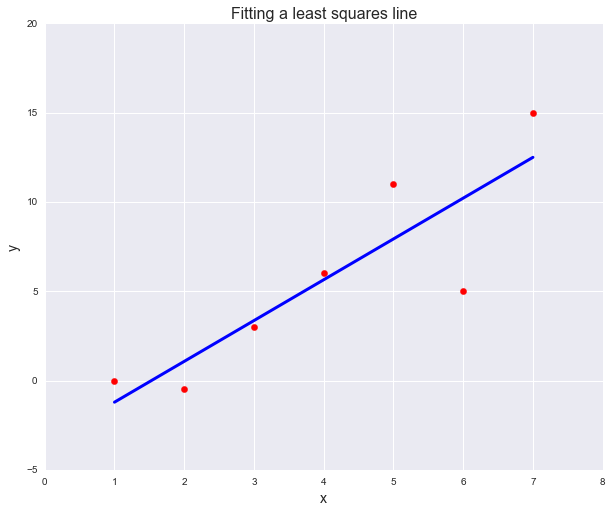

In [10]:
## SOLUTION

x = np.array([1,2,3,4,5,6,7])
y = np.array([0,-0.5,3,6,11,5,15])

b1 = sum((np.mean(x)-x)*(np.mean(y)-y))/sum((np.mean(x)-x)**2)
b0 = np.mean(y) - b1*np.mean(x)
print "Using the formulas"
print "b1 =", b1
print "b0 =", b0
print

X = np.column_stack([x,np.ones(len(x))])

b1 = la.inv(np.dot(X.T,X)).dot(X.T).dot(y.T)[0]
b0 = la.inv(np.dot(X.T,X)).dot(X.T).dot(y.T)[1]
print "Using linear algebra"
print "b1 =", b1
print "b0 =", b0

plt.figure(figsize=(10,8))
plt.title("Fitting a least squares line",size=16)
plt.scatter(x,y,s=40,color='red')
plt.plot(x, b0 + b1*x, color='blue', linewidth=3)
plt.ylabel('y',size=14)
plt.xlabel('x',size=14)
plt.show()

## More useful functions<a id='func'></a>

<ul>
<li>`linspace()`
<li>`argsort()`
<li>`argmax()`, `where()`
<li>`ravel()`
<li>`tile()`
</ul>

In [508]:
np.linspace(0,100,11)

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.])

In [568]:
z = np.random.random(10)
print z
print np.argmax(z)

[ 0.64790342  0.54037265  0.65491942  0.60678734  0.0718336   0.77429932
  0.14672363  0.32817658  0.44803789  0.17611966]
5


In [569]:
print z[np.argsort(z)]

[ 0.0718336   0.14672363  0.17611966  0.32817658  0.44803789  0.54037265
  0.60678734  0.64790342  0.65491942  0.77429932]


In [570]:
print z[np.argsort(z)[::-1]]   ## reverse order

[ 0.77429932  0.65491942  0.64790342  0.60678734  0.54037265  0.44803789
  0.32817658  0.17611966  0.14672363  0.0718336 ]


In [571]:
z = np.linspace(1,100,20)
c = np.random.choice(z)
print z
print c

[   1.            6.21052632   11.42105263   16.63157895   21.84210526
   27.05263158   32.26315789   37.47368421   42.68421053   47.89473684
   53.10526316   58.31578947   63.52631579   68.73684211   73.94736842
   79.15789474   84.36842105   89.57894737   94.78947368  100.        ]
11.4210526316


In [572]:
idx = np.where(z == c)
print idx

(array([2]),)


In [573]:
print z[idx]

[ 11.42105263]


In [574]:
z = np.arange(10*10).reshape(5,20)
print z

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]


In [575]:
print z.ravel()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [576]:
print np.tile( [[1, 2],[-2, -1]], [5, 3])

[[ 1  2  1  2  1  2]
 [-2 -1 -2 -1 -2 -1]
 [ 1  2  1  2  1  2]
 [-2 -1 -2 -1 -2 -1]
 [ 1  2  1  2  1  2]
 [-2 -1 -2 -1 -2 -1]
 [ 1  2  1  2  1  2]
 [-2 -1 -2 -1 -2 -1]
 [ 1  2  1  2  1  2]
 [-2 -1 -2 -1 -2 -1]]


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

1. Write a program to create a checkerboard `8x8` matrix using the `tile` function

2. Write a program to find the closest value (to a given number) in an array ? 


In [131]:
## SOLUTION - 1

Z = np.tile( np.array([[0,1],[1,0]]), (4,4))
print Z

## SOLUTION - 2

Z = np.arange(100)
v = np.random.uniform(0,100)
index = (np.abs(Z-v)).argmin()
print Z[index]

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
72


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Review Problems<a id='hmwk'></a>

**Q1**.

Write a program to swap any 2 rows of a numpy array. Hint: This is a one liner.

In [238]:
# SOLUTION

A = np.arange(25).reshape(5,5)
A[[0,1]] = A[[1,0]]
print A

[[ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


**Q2.**

Write two ways to get the diagonal elements of a dot product of two matrices, A and B.

In [239]:
## SOLUTION

A = np.arange(25).reshape(5,5)
B = np.arange(25).reshape(5,5)

print np.diag(np.dot(A, B))
print np.sum(A * B.T, axis=1)

[ 150  435  770 1155 1590]
[ 150  435  770 1155 1590]


**Q3.** Write a 12 by 12 times table matrix shwon below. Do this 

- using nested for loops
- uisng numpy fromfunction array constructor
- using numpy broadcasting 
```
array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])
```

In [271]:
## SOLUTION

import numpy as np
n = 12

def nested_loops(n):
    print("... using nested for loops...")

    for_list = np.empty([n,n],dtype=int) # initialize 12 x 12 numpy array
    for i in range(1,n+1):
        row_vals = np.empty([n]) # initialize an array for each row
        for j in range(1,13):
            row_vals[j-1] = j*i

        for_list[i-1] = row_vals
    
    return for_list


print nested_loops(n)
print

def fromfunction(n):
    print("... using numpy fromfunction array constructor...")

    return np.fromfunction(lambda i, j: (i+1) * (j+1), (n, n), dtype=int)

print fromfunction(n)
print

def broadcasting(n):
    print("...using numpy broadcasting...")
    a = np.arange(1,n+1)
    b = np.arange(1,n+1)

    return np.reshape(a,(n,1))*b # calculate outer product

print broadcasting(n)

... using nested for loops...
[[  1   2   3   4   5   6   7   8   9  10  11  12]
 [  2   4   6   8  10  12  14  16  18  20  22  24]
 [  3   6   9  12  15  18  21  24  27  30  33  36]
 [  4   8  12  16  20  24  28  32  36  40  44  48]
 [  5  10  15  20  25  30  35  40  45  50  55  60]
 [  6  12  18  24  30  36  42  48  54  60  66  72]
 [  7  14  21  28  35  42  49  56  63  70  77  84]
 [  8  16  24  32  40  48  56  64  72  80  88  96]
 [  9  18  27  36  45  54  63  72  81  90  99 108]
 [ 10  20  30  40  50  60  70  80  90 100 110 120]
 [ 11  22  33  44  55  66  77  88  99 110 121 132]
 [ 12  24  36  48  60  72  84  96 108 120 132 144]]

... using numpy fromfunction array constructor...
[[  1   2   3   4   5   6   7   8   9  10  11  12]
 [  2   4   6   8  10  12  14  16  18  20  22  24]
 [  3   6   9  12  15  18  21  24  27  30  33  36]
 [  4   8  12  16  20  24  28  32  36  40  44  48]
 [  5  10  15  20  25  30  35  40  45  50  55  60]
 [  6  12  18  24  30  36  42  48  54  60  66  72]


**Q4**.

Here is the normalized transition matrix from the exercise above:

```python
 P = [[ 0.30434783  0.34782609  0.34782609]
     [ 0.08333333  0.25        0.66666667]
     [ 0.75        0.16666667  0.08333333]]
 ```

Find the stationary distribution. You can do this by raising this matrix to a very large power, until the result doesn't change. For example:

$P^1$ = 
```python
    [[ 0.30434783  0.34782609  0.34782609]
     [ 0.08333333  0.25        0.66666667]
     [ 0.75        0.16666667  0.08333333]]
```

$P^2$ = 
```python
[[ 0.38248267  0.25078765  0.36672968]
 [ 0.54619565  0.20259662  0.25120773]
 [ 0.30464976  0.31642512  0.37892512]]
 ```
 
$P^3$ = 
```python
[[ 0.412354    0.25685598  0.33079002]
 [ 0.37152231  0.28249821  0.34597949]
 [ 0.40328209  0.2482256   0.34849231]]
```

With a large enough power, $P^{n} = P^{n+1}$. Write a function that can raise $P$ to any arbitrary power, n.

In [241]:
## SOLUTION

def raise_nth_power(n,transition):
    ''' Solve for stationary distribution by raising to the nth power '''
    
    temp = transition
    for i in range(n-1):    
        temp = transition.dot(temp)
    
    return temp

print raise_nth_power(3,P)

[[ 0.412354    0.25685598  0.33079002]
 [ 0.37152231  0.28249821  0.34597949]
 [ 0.40328209  0.2482256   0.34849231]]


**Q5.** Calculating moments: Moment Generating Functions

Write a function that calculates the moment, $t$ for a given probability distribution, $x$. The function should have the signature `discrete_mgf(x, t)` where:<br>

- `x` is a discrete `2D` probability vector where:
  - The first dimension are values that `X` can take. 
  - The second dimension is the probabilities that `X` takes on those values. 
    - *These should add to `1.0`*
    - *Both dimensions of `x` should be of the same length*
- `t` is the moment.


Moment Generating Functions are defined as:<br>

$$
M_x(t) = E[e^{tX}]
$$

For example:<br>

$$
    \begin{equation}
             \nonumber p_X(k) = \left\{
            \begin{array}{2 1}
              \frac{1}{6} & \quad  k=1\\
			   &  \quad   \\
               \frac{2}{6}  & \quad  k=2\\
			   &  \quad   \\
               \frac{3}{6}  & \quad  k=-1\\
            \end{array} \right.
    \end{equation}
$$

$E[e^{tX}] = \sum_{k=1}^{n} f_X(k)p_X(k) = \frac{1}{6}e^{(1)t} + \frac{2}{6}e^{(2)t} + \frac{3}{6}e^{(-1)t}$.<br>
<br>
When $t=2, E[e^{2X}] = \frac{1}{6}e^{(1)\times2} + \frac{2}{6}e^{(2)\times2} + \frac{3}{6}e^{(-1)\times2} = 19.5$



In [242]:
## SOLUTION

def discrete_mfg(x, t):
    
    assert np.allclose(sum(x[1]),1.0)
    assert len(x[0]) == len(x[1])
    
    return sum(np.exp(x[0]*t)*x[1])

x = np.array([[1,2,-1],[1./6,2./6,3./6]])
t = 2
discrete_mfg(x,t)

19.498560335821491

**Q7**.

Write a function that computes moving averages for an array and window size. For example

```python 
a = [0, 3, 3, 3, 9, 6, 9, 9, 12]
size = 3

moving_average(a, size = 3) = [  2.   3.   5.   6.   8.   8.  10.]
```

In [270]:
## SOLUTION

def moving_average(a, n) :

    ret = np.cumsum(a)
    ret[n:] = ret[n:] - ret[:-n]
    
    return ret[n - 1:] / n

a = [0,3,3,3,9.,6,9,9,12]
print moving_average(a, 3)

[  2.   3.   5.   6.   8.   8.  10.]
